In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Linear Regression from scratch

In [74]:
import numpy as np

class LinearRegression:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()
        
    def forward_pass(self, X):
        y = self.b + np.dot(X, self.W)
        return y
    
    def compute_loss(self, y, y_true):
        loss = np.sum(np.square(y - y_true))
        return loss/(2*y.shape[0])
    
    def backward_pass(self, X, y_true, y_hat):
        m = y_hat.shape[0]
        db = np.sum(y_hat - y_true)/m
        dW = np.sum(np.dot(np.transpose(y_hat - y_true), X), axis=0)/m
        return dW, db
    
    def update_params(self, dW, db, lr):
        self.W = self.W - lr * np.reshape(dW, (self.num_features, 1))
        self.b = self.b - lr * db
        
    def train(self, x_train, y_train, iterations, lr):
        losses = []
        for i in range(iterations):
            y_hat = self.forward_pass(x_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW, db, lr)
            loss = self.compute_loss(y_hat, y_train)
            losses.append(loss)
            if i % int(iterations/10) == 0:
                print('Iter: {}, Current loss: {:.4f}'.format(i, loss))
        return losses


### Let's feed this model some data.

In [75]:
df = pd.read_excel('chirps.xls')
df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998


In [77]:
x = df.X.values
y = df.Y.values
x = np.reshape(x, (x.shape[0], 1))
y = np.reshape(y, (y.shape[0], 1))

In [78]:
model = LinearRegression(1)

losses = model.train(x,y,200,0.0001)

Iter: 0, Current loss: 1216.0783
Iter: 20, Current loss: 395.0511
Iter: 40, Current loss: 132.5256
Iter: 60, Current loss: 48.5824
Iter: 80, Current loss: 21.7413
Iter: 100, Current loss: 13.1587
Iter: 120, Current loss: 10.4143
Iter: 140, Current loss: 9.5367
Iter: 160, Current loss: 9.2561
Iter: 180, Current loss: 9.1662


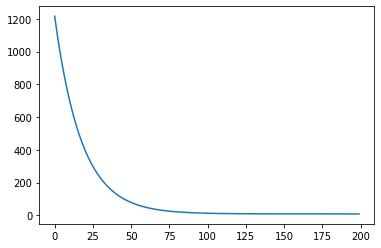

In [79]:
plt.plot(losses);

In [80]:
y_preds = model.forward_pass(x)

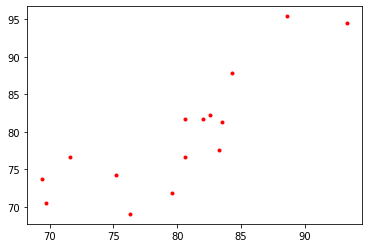

In [81]:
plt.plot(y, y_preds, 'r.');

In [82]:
print(model.W, model.b)

[[4.70646363]] 1.2676976892886807
